In [1]:
%matplotlib inline
%load_ext fireducks.pandas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv("./datasets/while-partnered.csv", index_col=0)
df["day"] = pd.to_datetime(df["day"], format="%Y-%m-%d")
df.head()

,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,...,subscribersGained,subscribersLost,estimatedRevenue,estimatedAdRevenue,grossRevenue,estimatedRedPartnerRevenue,monetizedPlaybacks,playbackBasedCpm,adImpressions,cpm
0,2020-10-12,1204,52,4,23,2,12,1,1,2170,...,6,1,0.613,0.589,1.071,0.023,127,8.433,141,7.596
1,2020-10-13,1139,88,6,21,0,10,4,2,2450,...,10,1,1.650,1.585,2.881,0.065,447,6.445,502,5.739
2,2020-10-14,1276,64,5,38,2,14,5,2,2655,...,6,1,1.399,1.368,2.488,0.031,491,5.067,537,4.633
3,2020-10-15,1230,58,4,21,0,10,4,1,2495,...,11,1,1.554,1.507,2.739,0.047,498,5.500,565,4.848
4,2020-10-16,1274,50,6,29,0,13,7,2,2936,...,9,1,1.482,1.440,2.618,0.042,460,5.691,508,5.154


In [7]:
df["day"] =df["day"].dt.strftime('%b %Y')
df.head()

,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,...,subscribersGained,subscribersLost,estimatedRevenue,estimatedAdRevenue,grossRevenue,estimatedRedPartnerRevenue,monetizedPlaybacks,playbackBasedCpm,adImpressions,cpm
0,Oct 2020,1204,52,4,23,2,12,1,1,2170,...,6,1,0.613,0.589,1.071,0.023,127,8.433,141,7.596
1,Oct 2020,1139,88,6,21,0,10,4,2,2450,...,10,1,1.650,1.585,2.881,0.065,447,6.445,502,5.739
2,Oct 2020,1276,64,5,38,2,14,5,2,2655,...,6,1,1.399,1.368,2.488,0.031,491,5.067,537,4.633
3,Oct 2020,1230,58,4,21,0,10,4,1,2495,...,11,1,1.554,1.507,2.739,0.047,498,5.500,565,4.848
4,Oct 2020,1274,50,6,29,0,13,7,2,2936,...,9,1,1.482,1.440,2.618,0.042,460,5.691,508,5.154


In [10]:
def kmeans_clustering(data,n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    return kmeans.predict(data),kmeans.cluster_centers_

/home/master/.virtualenvs/Pandas-Carberra-nubz/lib/python3.12/site-packages/fireducks/pandas/generic.py:775: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(
/home/master/.virtualenvs/Pandas-Carberra-nubz/lib/python3.12/site-packages/fireducks/pandas/generic.py:775: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(
/tmp/ipykernel_520607/2966195569.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


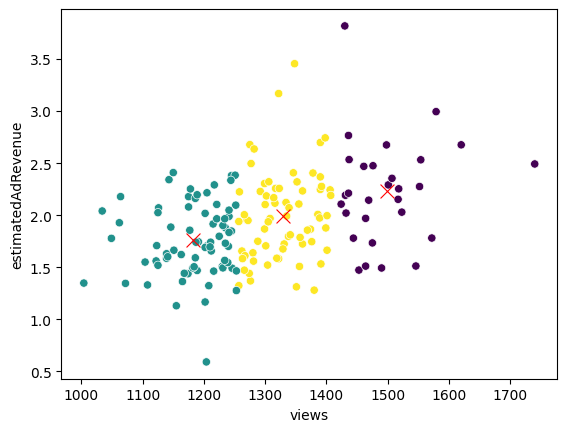

In [12]:
data=df[["views","estimatedAdRevenue"]]
pred,centroids = kmeans_clustering(data,3)
#centroids is the center of the clusters
fig = plt.figure()
sns.scatterplot(data=df,x="views",y="estimatedAdRevenue",c=pred)
sns.scatterplot(x=centroids[:,0],y=centroids[:,1],s=100,marker="x",c="red")
fig.show()